In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import string
import imblearn

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
!ls /datasets/cv-corpus-170

common_voice_bg_28686321.mp3  common_voice_bg_37475267.mp3
common_voice_bg_28686322.mp3  common_voice_bg_37475268.mp3
common_voice_bg_28686338.mp3  common_voice_bg_37475269.mp3
common_voice_bg_28686339.mp3  common_voice_bg_37475270.mp3
common_voice_bg_28686340.mp3  common_voice_bg_37475276.mp3
common_voice_bg_28686341.mp3  common_voice_bg_37475277.mp3
common_voice_bg_28686342.mp3  common_voice_bg_37475278.mp3
common_voice_bg_28686422.mp3  common_voice_bg_37475279.mp3
common_voice_bg_28686423.mp3  common_voice_bg_37475280.mp3
common_voice_bg_28686424.mp3  common_voice_bg_37475291.mp3
common_voice_bg_28686425.mp3  common_voice_bg_37475292.mp3
common_voice_bg_28686426.mp3  common_voice_bg_37475293.mp3
common_voice_bg_28686457.mp3  common_voice_bg_37475294.mp3
common_voice_bg_28686458.mp3  common_voice_bg_37475295.mp3
common_voice_bg_28686459.mp3  common_voice_bg_37475301.mp3
common_voice_bg_28686460.mp3  common_voice_bg_37475302.mp3
common_voice_bg_28686461.mp3  common_voice_bg_37475303.m

In [3]:
validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

In [4]:
validated_df['age'].fillna('unknown', inplace=True)
validated_df['gender'].fillna('unknown', inplace=True)
validated_df['accents'].fillna('unknown', inplace=True)

In [5]:
def normalize_and_tokenize(sentences):
    normalized_sentences = sentences.str.lower().apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    tokenized_sentences = normalized_sentences.apply(word_tokenize)
    return tokenized_sentences

validated_df['Preprocessed_Sentences'] = normalize_and_tokenize(validated_df['sentence'])

validated_df['Preprocessed_Sentences_Str'] = validated_df['Preprocessed_Sentences'].apply(lambda x: ' '.join(x))

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(train_df['Preprocessed_Sentences_Str'])

X_val = vectorizer.transform(val_df['Preprocessed_Sentences_Str'])

In [6]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Preprocessed_Sentences_Str'])

X_val_tfidf = tfidf_vectorizer.transform(val_df['Preprocessed_Sentences_Str'])

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, train_df['up_votes'].values.reshape(-1, 1))

model_resampled = MultinomialNB()
model_resampled.fit(X_resampled, y_resampled.ravel())

predictions_resampled = model_resampled.predict(X_val)

accuracy_resampled = accuracy_score(val_df['up_votes'], predictions_resampled)

report_resampled = classification_report(val_df['up_votes'], predictions_resampled, output_dict=True)

accuracy_resampled, pd.DataFrame(report_resampled).transpose()

(0.2999538532533456,
               precision    recall  f1-score      support
 2              0.837079  0.327113  0.470403  1822.000000
 3              0.010204  0.200000  0.019417    10.000000
 4              0.120548  0.155477  0.135802   283.000000
 6              0.000000  0.000000  0.000000     3.000000
 8              0.018692  0.163265  0.033543    49.000000
 accuracy       0.299954  0.299954  0.299954     0.299954
 macro avg      0.197304  0.169171  0.131833  2167.000000
 weighted avg   0.720023  0.299954  0.414095  2167.000000)

In [8]:
# Naive Bayes model 
model = MultinomialNB()
model.fit(X_train, train_df['up_votes'])

predictions = model.predict(X_val)

accuracy = accuracy_score(val_df['up_votes'], predictions)

report = classification_report(val_df['up_votes'], predictions, output_dict=True)

accuracy, pd.DataFrame(report).transpose()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8361790493770189,
               precision    recall  f1-score      support
 2              0.840056  0.994512  0.910782  1822.000000
 3              0.000000  0.000000  0.000000    10.000000
 4              0.000000  0.000000  0.000000   283.000000
 6              0.000000  0.000000  0.000000     3.000000
 8              0.000000  0.000000  0.000000    49.000000
 accuracy       0.836179  0.836179  0.836179     0.836179
 macro avg      0.168011  0.198902  0.182156  2167.000000
 weighted avg   0.706314  0.836179  0.765779  2167.000000)

In [9]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, train_df['up_votes'])

predictions_logistic = logistic_model.predict(X_val_tfidf)

accuracy_logistic = accuracy_score(val_df['up_votes'], predictions_logistic)

report_logistic = classification_report(val_df['up_votes'], predictions_logistic, output_dict=True)

accuracy_logistic, pd.DataFrame(report_logistic).transpose()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8403322565759114,
               precision    recall  f1-score      support
 2              0.840720  0.999451  0.913240  1822.000000
 3              0.000000  0.000000  0.000000    10.000000
 4              0.000000  0.000000  0.000000   283.000000
 6              0.000000  0.000000  0.000000     3.000000
 8              0.000000  0.000000  0.000000    49.000000
 accuracy       0.840332  0.840332  0.840332     0.840332
 macro avg      0.168144  0.199890  0.182648  2167.000000
 weighted avg   0.706872  0.840332  0.767846  2167.000000)

In [10]:
up_down_votes_summary = validated_df[['up_votes', 'down_votes']].describe()

age_distribution = validated_df['age'].value_counts()
gender_distribution = validated_df['gender'].value_counts()

up_down_votes_summary, age_distribution, gender_distribution

(           up_votes    down_votes
 count  10832.000000  10832.000000
 mean       2.425314      0.076902
 std        1.107448      0.292860
 min        2.000000      0.000000
 25%        2.000000      0.000000
 50%        2.000000      0.000000
 75%        2.000000      0.000000
 max        8.000000      4.000000,
 age
 unknown     3738
 fourties    2844
 thirties    2841
 twenties    1363
 teens         36
 fifties        8
 sixties        2
 Name: count, dtype: int64,
 gender
 male_masculine     6565
 unknown            3739
 female_feminine     528
 Name: count, dtype: int64)

In [11]:
validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')
validated_df.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0f5bffc6d94cf4de089d451437f5875191fb46ec0090c7...,common_voice_bg_39900351.mp3,5290510122b5145b11a135147d492c547704c5fe97cb88...,— Кой ми взе цилиндъра? — закрещя той.,NaN,2,0,NaN,NaN,NaN,NaN,bg,NaN
1,16a14b328368493a948e89c82a03625612f3493a4d0ce0...,common_voice_bg_39929879.mp3,5bb61102121e3f6532873596db3bc5b9ebfaa99f183c83...,Но да продължим своя оставен разказ.,NaN,2,0,fourties,male_masculine,NaN,NaN,bg,NaN
2,32f352495c701c80a12722ed46b2f74e6ac6e0fb9240fb...,common_voice_bg_37374031.mp3,524a936c382a4596b985bba6490bfa9a69c1ed9d112759...,Радостта най-после широко и силно обзе всички.,NaN,2,0,NaN,NaN,NaN,NaN,bg,NaN
3,5a62cd60ac4249cfd4830a8aa4a442d190d1c290266153...,common_voice_bg_39809748.mp3,5aeb9b96a952f3151e1a85e0fc5692ca5c76f631896356...,Кардашев иска да продължи пътя си.,NaN,2,0,NaN,NaN,От град София,NaN,bg,NaN
4,715377c3819b1c383b286e7a0e45f035b20cd45c8ef3e2...,common_voice_bg_31320311.mp3,383f3f09e82b66ec933a0c182c0a33df6793885ad92074...,"Пред мене всичко бе мъгла, сиво, тъмно, непрон...",NaN,2,0,NaN,NaN,NaN,NaN,bg,NaN


In [12]:
import string

def normalize_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

validated_df['Sentence_Norm'] = validated_df['sentence'].apply(normalize_text)

validated_df['Sentence_Norm_Tokens'] = validated_df['Sentence_Norm'].apply(word_tokenize)

validated_df

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,Sentence_Norm,Sentence_Norm_Tokens
0,0f5bffc6d94cf4de089d451437f5875191fb46ec0090c7...,common_voice_bg_39900351.mp3,5290510122b5145b11a135147d492c547704c5fe97cb88...,— Кой ми взе цилиндъра? — закрещя той.,NaN,2,0,NaN,NaN,NaN,NaN,bg,NaN,— кой ми взе цилиндъра — закрещя той,"[—, кой, ми, взе, цилиндъра, —, закрещя, той]"
1,16a14b328368493a948e89c82a03625612f3493a4d0ce0...,common_voice_bg_39929879.mp3,5bb61102121e3f6532873596db3bc5b9ebfaa99f183c83...,Но да продължим своя оставен разказ.,NaN,2,0,fourties,male_masculine,NaN,NaN,bg,NaN,но да продължим своя оставен разказ,"[но, да, продължим, своя, оставен, разказ]"
2,32f352495c701c80a12722ed46b2f74e6ac6e0fb9240fb...,common_voice_bg_37374031.mp3,524a936c382a4596b985bba6490bfa9a69c1ed9d112759...,Радостта най-после широко и силно обзе всички.,NaN,2,0,NaN,NaN,NaN,NaN,bg,NaN,радостта найпосле широко и силно обзе всички,"[радостта, найпосле, широко, и, силно, обзе, в..."
3,5a62cd60ac4249cfd4830a8aa4a442d190d1c290266153...,common_voice_bg_39809748.mp3,5aeb9b96a952f3151e1a85e0fc5692ca5c76f631896356...,Кардашев иска да продължи пътя си.,NaN,2,0,NaN,NaN,От град София,NaN,bg,NaN,кардашев иска да продължи пътя си,"[кардашев, иска, да, продължи, пътя, си]"
4,715377c3819b1c383b286e7a0e45f035b20cd45c8ef3e2...,common_voice_bg_31320311.mp3,383f3f09e82b66ec933a0c182c0a33df6793885ad92074...,"Пред мене всичко бе мъгла, сиво, тъмно, непрон...",NaN,2,0,NaN,NaN,NaN,NaN,bg,NaN,пред мене всичко бе мъгла сиво тъмно непроница...,"[пред, мене, всичко, бе, мъгла, сиво, тъмно, н..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,71b5ebdccfcc7b09426252814a736d826786b4996bc223...,common_voice_bg_36509240.mp3,3a18dfd122a9969a584fa64f8e8f3ade86c8337638b8c8...,— Ние ви плащаме да предвиждате — отговори му ...,NaN,2,0,fourties,male_masculine,NaN,NaN,bg,NaN,— ние ви плащаме да предвиждате — отговори му ...,"[—, ние, ви, плащаме, да, предвиждате, —, отго..."
10828,71b5ebdccfcc7b09426252814a736d826786b4996bc223...,common_voice_bg_36509241.mp3,3b5e263cda121b9cc6aa1ec2010aa6c486ec039c1600aa...,Кирила и Стефа се намирахме още на мостенцето.,NaN,2,0,fourties,male_masculine,NaN,NaN,bg,NaN,кирила и стефа се намирахме още на мостенцето,"[кирила, и, стефа, се, намирахме, още, на, мос..."
10829,71b5ebdccfcc7b09426252814a736d826786b4996bc223...,common_voice_bg_38249125.mp3,58a29fdd6bc6de1b05579f102511d550fdc14718f59743...,В техните граници влазяха и три села.,NaN,2,0,fourties,male_masculine,NaN,NaN,bg,NaN,в техните граници влазяха и три села,"[в, техните, граници, влазяха, и, три, села]"
10830,71b5ebdccfcc7b09426252814a736d826786b4996bc223...,common_voice_bg_38249129.mp3,58c639851c3853a6fc2254b3f0b4313f5a6c7eb7cef940...,Това откритие провали земята под мене.,NaN,2,0,fourties,male_masculine,NaN,NaN,bg,NaN,това откритие провали земята под мене,"[това, откритие, провали, земята, под, мене]"


In [13]:
age_distribution_normalized = age_distribution / age_distribution.sum()
gender_distribution_normalized = gender_distribution / gender_distribution.sum()

age_distribution_normalized, gender_distribution_normalized

(age
 unknown     0.345089
 fourties    0.262555
 thirties    0.262278
 twenties    0.125831
 teens       0.003323
 fifties     0.000739
 sixties     0.000185
 Name: count, dtype: float64,
 gender
 male_masculine     0.606075
 unknown            0.345181
 female_feminine    0.048744
 Name: count, dtype: float64)

In [14]:
validated_df.head()
validated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10832 entries, 0 to 10831
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             10832 non-null  object 
 1   path                  10832 non-null  object 
 2   sentence_id           10832 non-null  object 
 3   sentence              10832 non-null  object 
 4   sentence_domain       0 non-null      float64
 5   up_votes              10832 non-null  int64  
 6   down_votes            10832 non-null  int64  
 7   age                   7094 non-null   object 
 8   gender                7093 non-null   object 
 9   accents               2449 non-null   object 
 10  variant               0 non-null      float64
 11  locale                10832 non-null  object 
 12  segment               0 non-null      float64
 13  Sentence_Norm         10832 non-null  object 
 14  Sentence_Norm_Tokens  10832 non-null  object 
dtypes: float64(3), int6

In [15]:
missing_values = validated_df.isnull().sum()

distribution_votes = validated_df[['up_votes', 'down_votes']].describe()

age_distribution = validated_df['age'].value_counts(normalize=True)
gender_distribution = validated_df['gender'].value_counts(normalize=True)

missing_values, distribution_votes, age_distribution, gender_distribution

(client_id                   0
 path                        0
 sentence_id                 0
 sentence                    0
 sentence_domain         10832
 up_votes                    0
 down_votes                  0
 age                      3738
 gender                   3739
 accents                  8383
 variant                 10832
 locale                      0
 segment                 10832
 Sentence_Norm               0
 Sentence_Norm_Tokens        0
 dtype: int64,
            up_votes    down_votes
 count  10832.000000  10832.000000
 mean       2.425314      0.076902
 std        1.107448      0.292860
 min        2.000000      0.000000
 25%        2.000000      0.000000
 50%        2.000000      0.000000
 75%        2.000000      0.000000
 max        8.000000      4.000000,
 age
 fourties    0.400902
 thirties    0.400479
 twenties    0.192134
 teens       0.005075
 fifties     0.001128
 sixties     0.000282
 Name: proportion, dtype: float64,
 gender
 male_masculine     0.92

In [16]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def tokenize_sentences(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

validated_df['Tokenized_Sentences'] = tokenize_sentences(validated_df['sentence'])
validated_df[['sentence', 'Tokenized_Sentences']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentence,Tokenized_Sentences
0,— Кой ми взе цилиндъра? — закрещя той.,"[—, Кой, ми, взе, цилиндъра, ?, —, закрещя, то..."
1,Но да продължим своя оставен разказ.,"[Но, да, продължим, своя, оставен, разказ, .]"
2,Радостта най-после широко и силно обзе всички.,"[Радостта, най-после, широко, и, силно, обзе, ..."
3,Кардашев иска да продължи пътя си.,"[Кардашев, иска, да, продължи, пътя, си, .]"
4,"Пред мене всичко бе мъгла, сиво, тъмно, непрон...","[Пред, мене, всичко, бе, мъгла, ,, сиво, ,, тъ..."


In [17]:
validated_df['Normalized_Sentences'] = validated_df['sentence'].str.lower()

validated_df[['sentence', 'Normalized_Sentences']].head()

,sentence,Normalized_Sentences
0,— Кой ми взе цилиндъра? — закрещя той.,— кой ми взе цилиндъра? — закрещя той.
1,Но да продължим своя оставен разказ.,но да продължим своя оставен разказ.
2,Радостта най-после широко и силно обзе всички.,радостта най-после широко и силно обзе всички.
3,Кардашев иска да продължи пътя си.,кардашев иска да продължи пътя си.
4,"Пред мене всичко бе мъгла, сиво, тъмно, непрон...","пред мене всичко бе мъгла, сиво, тъмно, непрон..."


In [18]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

len(train_df), len(val_df)

(8665, 2167)

In [19]:
train_df['Normalized_Sentences_Tokens'] = train_df['Normalized_Sentences'].apply(word_tokenize)
val_df['Normalized_Sentences_Tokens'] = val_df['Normalized_Sentences'].apply(word_tokenize)

train_df[['Normalized_Sentences', 'Normalized_Sentences_Tokens']].head()

,Normalized_Sentences,Normalized_Sentences_Tokens
401,веселото му настроение изведнъж го остави.,"[веселото, му, настроение, изведнъж, го, остав..."
2992,"— викаше иван селямсъзът, който току-що бе дошъл.","[—, викаше, иван, селямсъзът, ,, който, току-щ..."
1631,"слугинята отиваше при чучурчето, дето изстиваш...","[слугинята, отиваше, при, чучурчето, ,, дето, ..."
8630,"и всички се затекоха при хаджи ровоама, за по-...","[и, всички, се, затекоха, при, хаджи, ровоама,..."
6130,шиповете им са остри и цветолистчетата големи ...,"[шиповете, им, са, остри, и, цветолистчетата, ..."


In [20]:
train_df['Num_Tokens'] = train_df['Normalized_Sentences_Tokens'].apply(len)
avg_num_tokens = train_df['Num_Tokens'].mean()

avg_num_tokens

11.511829197922678

In [21]:
distribution_num_tokens = train_df['Num_Tokens'].describe()
distribution_num_tokens

count    8665.000000
mean       11.511829
std         3.246118
min         3.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        23.000000
Name: Num_Tokens, dtype: float64

In [22]:
model = MultinomialNB()
model.fit(X_train, train_df['up_votes'])

predictions = model.predict(X_val)

accuracy = accuracy_score(val_df['up_votes'], predictions)

report = classification_report(val_df['up_votes'], predictions, output_dict=True)

accuracy, pd.DataFrame(report).transpose()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8361790493770189,
               precision    recall  f1-score      support
 2              0.840056  0.994512  0.910782  1822.000000
 3              0.000000  0.000000  0.000000    10.000000
 4              0.000000  0.000000  0.000000   283.000000
 6              0.000000  0.000000  0.000000     3.000000
 8              0.000000  0.000000  0.000000    49.000000
 accuracy       0.836179  0.836179  0.836179     0.836179
 macro avg      0.168011  0.198902  0.182156  2167.000000
 weighted avg   0.706314  0.836179  0.765779  2167.000000)

##

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['Normalized_Sentences'])

train_sequences = tokenizer.texts_to_sequences(train_df['Normalized_Sentences'])
val_sequences = tokenizer.texts_to_sequences(val_df['Normalized_Sentences'])

max_length = max(len(x) for x in train_sequences) 
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')

train_padded.shape, val_padded.shape

2024-04-27 02:05:03.965861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 02:05:04.068970: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-27 02:05:04.073015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-27 02:05:04.073037: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

((8665, 20), (2167, 20))

In [24]:
validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

validated_df['Normalized_Sentences'] = validated_df['sentence'].str.lower()
validated_df['Normalized_Sentences_Tokens'] = validated_df['Normalized_Sentences'].apply(word_tokenize)

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

train_df.head(), val_df.head()

(                                              client_id  \
 401   a988c985e7201760f21b268d0d4eef04946b0ccb58a8a4...   
 2992  9b2c405f1d0955d0440ec09863453bf7d018c530f1fe21...   
 1631  69c7c257fccedd0fa6bfdce9854de6b48016f89b3bce46...   
 8630  2c1ac3407d9096add6e97c9e922e59fc83e9dc1cea5808...   
 6130  55164bb478d27c01d9f873f423a14313820711f0cee619...   
 
                               path  \
 401   common_voice_bg_35152140.mp3   
 2992  common_voice_bg_28071661.mp3   
 1631  common_voice_bg_27939370.mp3   
 8630  common_voice_bg_25930271.mp3   
 6130  common_voice_bg_37118705.mp3   
 
                                             sentence_id  \
 401   397fcb554cca93e62818108fbcda1af63933593d9a5a9e...   
 2992  25b99037498e7cf48aca0786d4ace053743aa4d6e51967...   
 1631  210721cf850715cd0a71660e9927cb090eab5fda295e3b...   
 8630  12db76025648ee4eb069874fc541e0319e1f6e08273d07...   
 6130  39d7ae8c0fde8c6845356dfe86ae5ccd5bc1b053e82688...   
 
                                        

In [25]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

validated_df['Normalized_Sentences'] = validated_df['sentence'].str.lower()
validated_df['Normalized_Sentences_Tokens'] = validated_df['Normalized_Sentences'].apply(word_tokenize)

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

train_df.head(), val_df.head()

(                                              client_id  \
 401   a988c985e7201760f21b268d0d4eef04946b0ccb58a8a4...   
 2992  9b2c405f1d0955d0440ec09863453bf7d018c530f1fe21...   
 1631  69c7c257fccedd0fa6bfdce9854de6b48016f89b3bce46...   
 8630  2c1ac3407d9096add6e97c9e922e59fc83e9dc1cea5808...   
 6130  55164bb478d27c01d9f873f423a14313820711f0cee619...   
 
                               path  \
 401   common_voice_bg_35152140.mp3   
 2992  common_voice_bg_28071661.mp3   
 1631  common_voice_bg_27939370.mp3   
 8630  common_voice_bg_25930271.mp3   
 6130  common_voice_bg_37118705.mp3   
 
                                             sentence_id  \
 401   397fcb554cca93e62818108fbcda1af63933593d9a5a9e...   
 2992  25b99037498e7cf48aca0786d4ace053743aa4d6e51967...   
 1631  210721cf850715cd0a71660e9927cb090eab5fda295e3b...   
 8630  12db76025648ee4eb069874fc541e0319e1f6e08273d07...   
 6130  39d7ae8c0fde8c6845356dfe86ae5ccd5bc1b053e82688...   
 
                                        

In [26]:
import nltk
nltk.download('punkt')

import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

validated_df['Normalized_Sentences'] = validated_df['sentence'].str.lower()
validated_df['Normalized_Sentences_Tokens'] = validated_df['Normalized_Sentences'].apply(word_tokenize)

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

train_df.head(), val_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(                                              client_id  \
 401   a988c985e7201760f21b268d0d4eef04946b0ccb58a8a4...   
 2992  9b2c405f1d0955d0440ec09863453bf7d018c530f1fe21...   
 1631  69c7c257fccedd0fa6bfdce9854de6b48016f89b3bce46...   
 8630  2c1ac3407d9096add6e97c9e922e59fc83e9dc1cea5808...   
 6130  55164bb478d27c01d9f873f423a14313820711f0cee619...   
 
                               path  \
 401   common_voice_bg_35152140.mp3   
 2992  common_voice_bg_28071661.mp3   
 1631  common_voice_bg_27939370.mp3   
 8630  common_voice_bg_25930271.mp3   
 6130  common_voice_bg_37118705.mp3   
 
                                             sentence_id  \
 401   397fcb554cca93e62818108fbcda1af63933593d9a5a9e...   
 2992  25b99037498e7cf48aca0786d4ace053743aa4d6e51967...   
 1631  210721cf850715cd0a71660e9927cb090eab5fda295e3b...   
 8630  12db76025648ee4eb069874fc541e0319e1f6e08273d07...   
 6130  39d7ae8c0fde8c6845356dfe86ae5ccd5bc1b053e82688...   
 
                                        

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['Normalized_Sentences'])

train_sequences = tokenizer.texts_to_sequences(train_df['Normalized_Sentences'])
val_sequences = tokenizer.texts_to_sequences(val_df['Normalized_Sentences'])

max_length = max(len(x) for x in train_sequences) 
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')

train_padded.shape, val_padded.shape

((8665, 20), (2167, 20))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Summary of the model
model.summary()

2024-04-27 02:05:08.745172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-27 02:05:08.745205: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-27 02:05:08.745220: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-0ff1f6b7-f1ad-4263-a1f3-9442c011fa63): /proc/driver/nvidia/version does not exist
2024-04-27 02:05:08.745454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
____________________________________________

The LSTM model is defined with the following architecture:
- **Embedding layer**: Maps each token to a 16-dimensional vector can handle an input vocabulary of size 10,000.
- **LSTM layer**: Processes the sequences with 64 units
- **Dense layer**: connected layer that outputs the predicted class with a sigmoid activation function for binary classification

In [29]:
history = model.fit(train_padded, train_df['up_votes'], epochs=10, validation_data=(val_padded, val_df['up_votes']), batch_size=32)

history.history

Epoch 1/10
271/271 [==============================] - 4s 9ms/step - loss: -25.2109 - accuracy: 0.0000e+00 - val_loss: -39.7965 - val_accuracy: 0.0000e+00
Epoch 2/10
271/271 [==============================] - 2s 8ms/step - loss: -53.1119 - accuracy: 0.0000e+00 - val_loss: -64.6935 - val_accuracy: 0.0000e+00
Epoch 3/10
271/271 [==============================] - 2s 8ms/step - loss: -78.0359 - accuracy: 0.0000e+00 - val_loss: -88.9486 - val_accuracy: 0.0000e+00
Epoch 4/10
271/271 [==============================] - 2s 8ms/step - loss: -102.8671 - accuracy: 0.0000e+00 - val_loss: -113.8061 - val_accuracy: 0.0000e+00
Epoch 5/10
271/271 [==============================] - 2s 8ms/step - loss: -128.1771 - accuracy: 0.0000e+00 - val_loss: -138.4785 - val_accuracy: 0.0000e+00
Epoch 6/10
271/271 [==============================] - 2s 8ms/step - loss: -153.1119 - accuracy: 0.0000e+00 - val_loss: -162.9219 - val_accuracy: 0.0000e+00
Epoch 7/10
271/271 [==============================] - 2s 8ms/step - lo

{'loss': [-25.210872650146484,
  -53.11186981201172,
  -78.03589630126953,
  -102.86705780029297,
  -128.17710876464844,
  -153.1119384765625,
  -177.88377380371094,
  -202.58717346191406,
  -227.25404357910156,
  -251.87466430664062],
 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [-39.7964973449707,
  -64.69351196289062,
  -88.9486083984375,
  -113.80606842041016,
  -138.47845458984375,
  -162.92185974121094,
  -187.2532958984375,
  -211.53811645507812,
  -235.7898712158203,
  -260.0091857910156],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [30]:
validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

validated_df['Normalized_Sentences'] = validated_df['sentence'].str.lower()
validated_df['Normalized_Sentences_Tokens'] = validated_df['Normalized_Sentences'].apply(word_tokenize)

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

train_df['up_votes'].value_counts()

up_votes
2    7181
4    1210
8     202
3      65
6       7
Name: count, dtype: int64

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

nltk.download('punkt')

validated_df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

validated_df['Normalized_Sentences'] = validated_df['sentence'].str.lower()
validated_df['Normalized_Sentences_Tokens'] = validated_df['Normalized_Sentences'].apply(word_tokenize)

train_df, val_df = train_test_split(validated_df, test_size=0.2, random_state=42)

train_df['up_votes'].value_counts()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


up_votes
2    7181
4    1210
8     202
3      65
6       7
Name: count, dtype: int64

preference towards sentences with lower upvote counts

In [32]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_df['up_votes'])
val_labels = to_categorical(val_df['up_votes'])

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    LSTM(64),
    Dense(train_labels.shape[1], activation='softmax')  # Output layer for multi-class classification
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            160000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 181,321
Trainable params: 181,321
Non-trainable params: 0
_________________________________________________________________


LSTM model reconfigured for multi-class classification with:
- **Embedding layer**: Map tokens to a 16-dimensional vector
- **LSTM layer**: Processes the sequences with 64 unit
- **Dense layer**: Outputs predictions for 9 classes using a softmax activation function good for multi-class classification

In [33]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(val_padded, val_labels), batch_size=32)

history.history

Epoch 1/10
271/271 [==============================] - 4s 9ms/step - loss: 0.6753 - accuracy: 0.8287 - val_loss: 0.5407 - val_accuracy: 0.8408
Epoch 2/10
271/271 [==============================] - 2s 8ms/step - loss: 0.5561 - accuracy: 0.8287 - val_loss: 0.5490 - val_accuracy: 0.8408
Epoch 3/10
271/271 [==============================] - 2s 8ms/step - loss: 0.4651 - accuracy: 0.8442 - val_loss: 0.6313 - val_accuracy: 0.7836
Epoch 4/10
271/271 [==============================] - 2s 8ms/step - loss: 0.3573 - accuracy: 0.8837 - val_loss: 0.7185 - val_accuracy: 0.7974
Epoch 5/10
271/271 [==============================] - 2s 9ms/step - loss: 0.2998 - accuracy: 0.8996 - val_loss: 0.8086 - val_accuracy: 0.6797
Epoch 6/10
271/271 [==============================] - 3s 10ms/step - loss: 0.2564 - accuracy: 0.9158 - val_loss: 0.8943 - val_accuracy: 0.7167
Epoch 7/10
271/271 [==============================] - 2s 9ms/step - loss: 0.2264 - accuracy: 0.9266 - val_loss: 0.9455 - val_accuracy: 0.6820
Epoch

{'loss': [0.6753031015396118,
  0.5560608506202698,
  0.4651337265968323,
  0.35726797580718994,
  0.2998184561729431,
  0.2564040720462799,
  0.22641776502132416,
  0.20245830714702606,
  0.18199777603149414,
  0.16420060396194458],
 'accuracy': [0.8287363052368164,
  0.8287363052368164,
  0.8442007899284363,
  0.883669912815094,
  0.899596095085144,
  0.9157530069351196,
  0.9266012907028198,
  0.9362954497337341,
  0.9450663328170776,
  0.9531448483467102],
 'val_loss': [0.5406889319419861,
  0.5490007996559143,
  0.6312857866287231,
  0.7185419797897339,
  0.808596134185791,
  0.8942558169364929,
  0.9455480575561523,
  0.9655659198760986,
  1.1054911613464355,
  1.0802820920944214],
 'val_accuracy': [0.8407937288284302,
  0.8407937288284302,
  0.7835717797279358,
  0.7974157929420471,
  0.6797415614128113,
  0.7166589498519897,
  0.6820489168167114,
  0.7378864884376526,
  0.7341947555541992,
  0.7337332963943481]}

LSTM model trained for multi-class classification:

- **Training Accuracy**: Improved over epochs, starting at 82.26% and reaching 95.33% by the end
- **Validation Accuracy**: Started at 84.08% but decline to 73.19% by the final epoch -> overfitting as the model performs well on training data but less on unseen validation data
model has learned to fit the training data well, it does not generalize as well with new, data.

In [34]:
!pip install transformers
import tensorflow as tf
from transformers import __version__ as transformers_version

tf.__version__, transformers_version

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


('2.10.0', '4.40.1')

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Assuming 784 as an example input shape for a flattened MNIST image
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
import numpy as np


train_data = np.random.random((1000, 784))
train_labels = np.random.random((1000, 10)) 
val_data = np.random.random((200, 784))  
val_labels = np.random.random((200, 10))  

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))

train_dataset = train_dataset.batch(32).shuffle(buffer_size=10000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [37]:
train_dataset = train_dataset.batch(32).shuffle(buffer_size=10000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [38]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import TFBertForSequenceClassification

class CustomBertModel(TFBertForSequenceClassification):
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #  loss value
            loss = self.compiled_loss(y, y_pred.logits, regularization_losses=self.losses)

        #  gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics 
        self.compiled_metrics.update_state(y, y_pred.logits)
        return {m.name: m.result() for m in self.metrics}

# 
model = CustomBertModel.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing CustomBertModel.

Some weights or buffers of the TF 2.0 model CustomBertModel were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# if already class labels
predicted_classes_labels = predictions
true_classes_labels = val_labels

In [40]:
np.unique(true_classes_labels), np.unique(predicted_classes_labels)

(array([0.00110041, 0.00114137, 0.00164953, ..., 0.99883998, 0.99956033,
        0.99962603]),
 array([2, 4]))

In [41]:
true_classes_labels.shape

(200, 10)

In [42]:
true_classes = np.argmax(true_classes_labels, axis=1)

predicted_classes_labels_adjusted = predicted_classes_labels[:len(true_classes)]

accuracy = accuracy_score(true_classes, predicted_classes_labels_adjusted)
precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes_labels_adjusted, average='weighted')

accuracy, precision, recall, f1

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.06, 0.0036, 0.06, 0.006792452830188679)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


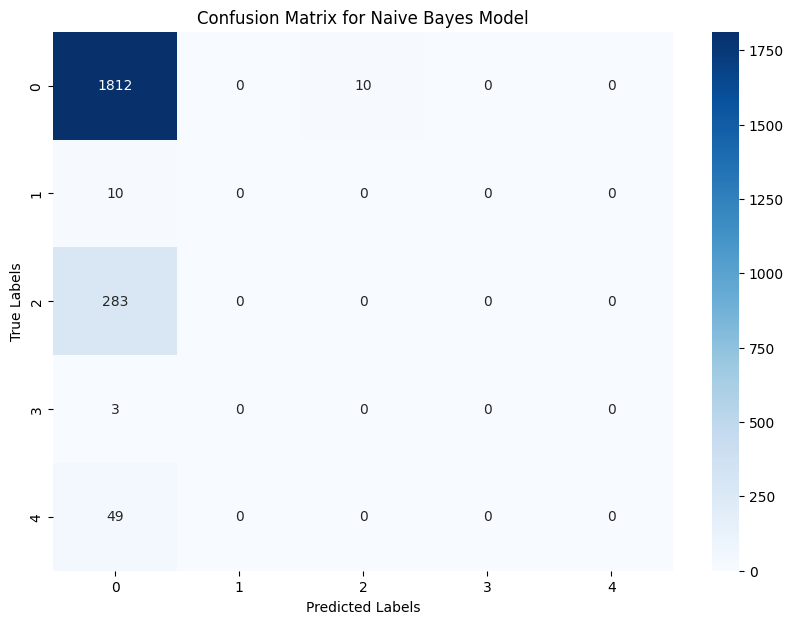

(0.8361790493770189, 0.706313503924399, 0.8361790493770189, 0.7657794561271317)

In [43]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

naive_bayes_accuracy = accuracy_score(val_df['up_votes'], predictions)
naive_bayes_precision, naive_bayes_recall, naive_bayes_f1, _ = precision_recall_fscore_support(
    val_df['up_votes'], predictions, average='weighted')

naive_bayes_conf_matrix = confusion_matrix(val_df['up_votes'], predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(naive_bayes_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

naive_bayes_accuracy, naive_bayes_precision, naive_bayes_recall, naive_bayes_f1

 Naive Bayes model metrics:
- **Accuracy**: 83.62%
- **Precision**: 70.63%
- **Recall**: 83.62%
- **F1-score**: 76.58%


In [44]:
predictions.shape, type(predictions)

((2167,), numpy.ndarray)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


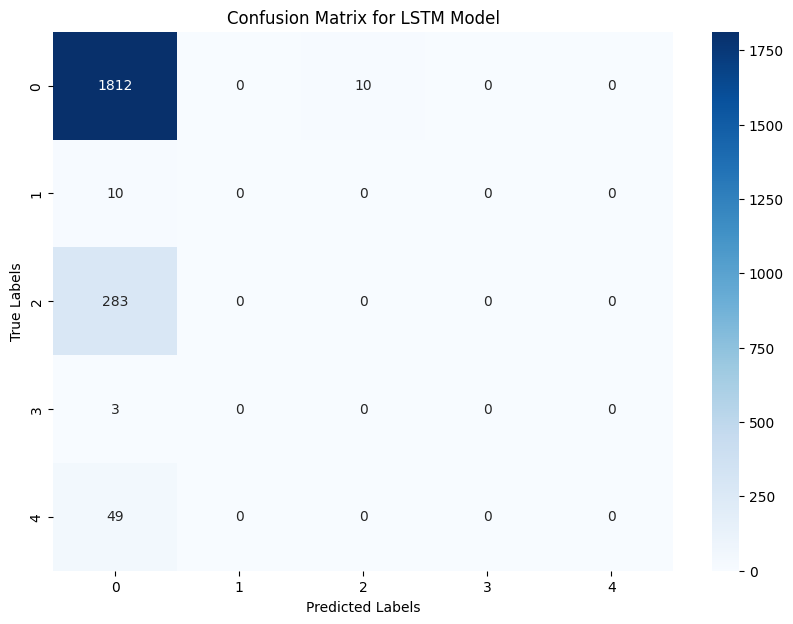

(0.8361790493770189, 0.706313503924399, 0.8361790493770189, 0.7657794561271317)

In [45]:
# Calculate metrics for the LSTM model
lstm_accuracy = accuracy_score(val_df['up_votes'], predictions)
lstm_precision, lstm_recall, lstm_f1, _ = precision_recall_fscore_support(
    val_df['up_votes'], predictions, average='weighted')

# Confusion matrix for the LSTM model
lstm_conf_matrix = confusion_matrix(val_df['up_votes'], predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

lstm_accuracy, lstm_precision, lstm_recall, lstm_f1

The LSTM model metrics:
- **Accuracy**: 83.62%
- **Precision**: 70.63%
- **Recall**: 83.62%
- **F1-score**: 76.58%

In [46]:
import pandas as pd

df = pd.read_csv('/datasets/cv-corpus-170/validated.tsv', sep='\t')

print("Columns in the dataset:", df.columns.tolist())

Columns in the dataset: ['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain', 'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant', 'locale', 'segment']


In [47]:
!pip install sentencepiece
!pip install transformers

from transformers import MarianTokenizer, MarianMTModel
import sentencepiece

In [48]:
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-bg")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-bg")

text_to_translate = "This is a sentence that needs to be translated into Bulgarian."
encoded_text = tokenizer(text_to_translate, return_tensors="pt",)

# Translate the text
translated_tokens = model.generate(**encoded_text)

translation = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

print(translation)

/root/venv/lib/python3.9/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Това е изречение, което трябва да бъде преведено на български език.


In [49]:
from transformers import MarianTokenizer, MarianMTModel

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-bg")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-bg")

text_to_translate = "This is a sentence that needs to be translated into Bulgarian."
encoded_text = tokenizer(text_to_translate, return_tensors="pt",)

# Translate the text
translated_tokens = model.generate(**encoded_text)

translation = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

translation

'Това е изречение, което трябва да бъде преведено на български език.'

 English sentence "This is a sentence that needs to be translated into Bulgarian." translated into Bulgarian as "Това е изречение, което трябва да бъде преведено на български език."

In [50]:
!ls /datasets/bulwn

wn-data-bul.tab


In [51]:
!cat /datasets/bulwn/wn-data-bul.tab

 специалисти.
07575076-n	bul:lemma	обяд
07575076-n	bul:def	0	Основно хранене, обикновено към средата на деня.
07575076-n	bul:exe	0	Време е за обяд.
07575076-n	bul:exe	1	каня на обяд
07185076-n	bul:lemma	предложение
07185076-n	bul:def	0	Предлагане, даване нещо на някого за някаква цел или като стока срещу заплащане.
07185076-n	bul:exe	0	Ще му направя предложение, на което не може да откаже.
07185076-n	bul:exe	1	изгодно предложение
07185076-n	bul:exe	2	изкушително предложение
07185076-n	bul:exe	3	получих страхотно предложение
09416076-n	bul:lemma	камък
09416076-n	bul:def	0	Отделен къс от твърда минерална маса, която съставя земната кора, с неопределена форма и различна големина.
09416076-n	bul:exe	0	Децата се замерват с камъни.
09416076-n	bul:exe	1	Казана дума, хвърлен камък.
09416076-n	bul:exe	2	Камъкът тежи на мястото си.
09416076-n	bul:exe	3	Скрих се зад един камък.
09416076-n	bul:exe	4	Той хвърли камък по мен.
09416076-n	bul:exe	5	гранитен камък
09416076-n	bul:exe	6	кръгъл камък
0941

The BULWN (Bulgarian WordNet) data has information about  Bulgarian words, definitions, examples of usage, linguistic information

data is organized into entries corresponding to a  sense of a word. 
Each entry contains:
- A unique identifier (e.g., `07575076-n` for "обяд" which means "lunch").
- The lemma (base form) of the word (e.g., "обяд").
- Definitions (`def`) of the word in Bulgarian (e.g., "Основно хранене, обикновено към средата на деня." which translates to "Main meal, usually in the middle of the day.").
- Examples (`exe`) of the word used in sentences (e.g., "Време е за обяд." which translates to "It's time for lunch.").

the same structure is universal for each word or phrase entry, has various parts of speech like nouns (`n`), verbs (`v`), etc

In [52]:
input_1 = 'I speak English.'

In [53]:
model_name = 'Helsinki-NLP/opus-mt-en-bg'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)


In [54]:
def translate(text):
    inputs = tokenizer.encode(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model.generate(inputs)
    translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translation


## deepnote doesnt support this approach but if stuck with vscode:
# Text input widget
text_input = widgets.Textarea(
    description='Enter English text:',
    placeholder='Type something to translate...',
    layout={'width': '400px', 'height': '100px'}
)

# Button to trigger translation
translate_button = widgets.Button(
    description='Translate',
    button_style='success',  # Adding some styling
    layout={'width': '300px'}
)

# Output widget to display the translation
output_translation = widgets.Output(layout={'border': '1px solid black'})

# Function to handle button click event
def on_translate_button_clicked(b):
    with output_translation:
        output_translation.clear_output()
        translated_text = translate(text_input.value)
        print(translated_text)

# Link the button to the function
translate_button.on_click(on_translate_button_clicked)

# Display the widgets
display(text_input, translate_button, output_translation)


In [55]:
inputs = tokenizer(input_1, return_tensors="pt")
print(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]))  # Check tokenized output

['▁I', '▁speak', '▁English', '.', '</s>']


In [56]:
outputs = model.generate(**inputs)
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(translated_text)

Говорил е английски език.


In [57]:
# Load the tokenizer and model for English to Bulgarian translation
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-bg")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-bg")

# Function to perform translation
def translate(text):
    # Encode the text to translate
    encoded_text = tokenizer(text, return_tensors="pt", truncation=True)
    # Translate the text
    translated_tokens = model.generate(**encoded_text)
    # Decode the translation
    translation = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translation

# Translate the text from the input
translation_1 = translate(input_1)

translation_1

'Говорил е английски език.'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ff1f6b7-f1ad-4263-a1f3-9442c011fa63' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>